In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

from statsmodels.tsa.deterministic import DeterministicProcess, CalendarFourier
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf

from xgboost import XGBRegressor
#https://towardsdatascience.com/top-4-time-series-feature-engineering-lessons-from-kaggle-ca2d4c9cbbe7

In [2]:
df = pd.read_csv('/Users/gurjotsingh/Downloads/store-sales-time-series-forecasting/train.csv',index_col ='date',parse_dates=True)

In [3]:
X_test = pd.read_csv('/Users/gurjotsingh/Downloads/store-sales-time-series-forecasting/test.csv',index_col ='date',parse_dates=True)

In [4]:
df.head()

,id,store_nbr,family,sales,onpromotion
date,,,,,
2013-01-01,0,1,AUTOMOTIVE,0.0,0
2013-01-01,1,1,BABY CARE,0.0,0
2013-01-01,2,1,BEAUTY,0.0,0
2013-01-01,3,1,BEVERAGES,0.0,0
2013-01-01,4,1,BOOKS,0.0,0


In [5]:
family_unique = len(df.family.unique())

In [6]:
family_unique

33

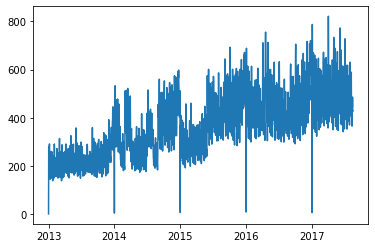

In [7]:
plt.plot(df.groupby(df.index)["sales"].mean())

In [8]:
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
dfOh = pd.DataFrame( ohe.fit_transform( np.array(df.family).reshape( (-1, 1) ) ) )


In [9]:
dfOh.columns = df.family.unique()

In [10]:
dfOh.index = df.index

df = pd.concat([df.drop('family',axis=1),dfOh],axis=1)
df.head()

,id,store_nbr,sales,onpromotion,AUTOMOTIVE,BABY CARE,BEAUTY,BEVERAGES,BOOKS,BREAD/BAKERY,...,MAGAZINES,MEATS,PERSONAL CARE,PET SUPPLIES,PLAYERS AND ELECTRONICS,POULTRY,PREPARED FOODS,PRODUCE,SCHOOL AND OFFICE SUPPLIES,SEAFOOD
date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,0,1,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-01-01,1,1,0.0,0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-01-01,2,1,0.0,0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-01-01,3,1,0.0,0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-01-01,4,1,0.0,0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
dfOh = pd.DataFrame( ohe.transform( np.array(X_test.family).reshape( (-1, 1) ) ) )
dfOh.columns = X_test.family.unique()
dfOh.index = X_test.index

X_test = pd.concat([X_test.drop("family", axis=1), dfOh], axis=1)
X_test.head()

,id,store_nbr,onpromotion,AUTOMOTIVE,BABY CARE,BEAUTY,BEVERAGES,BOOKS,BREAD/BAKERY,CELEBRATION,...,MAGAZINES,MEATS,PERSONAL CARE,PET SUPPLIES,PLAYERS AND ELECTRONICS,POULTRY,PREPARED FOODS,PRODUCE,SCHOOL AND OFFICE SUPPLIES,SEAFOOD
date,,,,,,,,,,,,,,,,,,,,,
2017-08-16,3000888,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-08-16,3000889,1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-08-16,3000890,1,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-08-16,3000891,1,20,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-08-16,3000892,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
X = df.copy()
y = X.pop('sales')

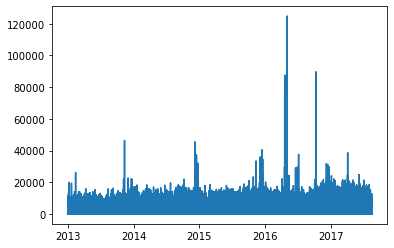

In [13]:
plt.plot(y)

In [14]:
dp = DeterministicProcess(index= X.index,order=1,drop=True)
dp.in_sample()

,trend
date,
2013-01-01,1.0
2013-01-01,2.0
2013-01-01,3.0
2013-01-01,4.0
2013-01-01,5.0
...,...
2017-08-15,3000884.0
2017-08-15,3000885.0
2017-08-15,3000886.0


In [15]:
X= pd.concat([X,dp.in_sample()],axis=1)

In [16]:
X_test =pd.concat([X_test,dp.out_of_sample(steps=X_test.shape[0],forecast_index=X_test.index)],axis=1)

In [17]:
X.head()

,id,store_nbr,onpromotion,AUTOMOTIVE,BABY CARE,BEAUTY,BEVERAGES,BOOKS,BREAD/BAKERY,CELEBRATION,...,MEATS,PERSONAL CARE,PET SUPPLIES,PLAYERS AND ELECTRONICS,POULTRY,PREPARED FOODS,PRODUCE,SCHOOL AND OFFICE SUPPLIES,SEAFOOD,trend
date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,0,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2013-01-01,1,1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2013-01-01,2,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
2013-01-01,3,1,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
2013-01-01,4,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0


In [18]:
X_test.head()

,id,store_nbr,onpromotion,AUTOMOTIVE,BABY CARE,BEAUTY,BEVERAGES,BOOKS,BREAD/BAKERY,CELEBRATION,...,MEATS,PERSONAL CARE,PET SUPPLIES,PLAYERS AND ELECTRONICS,POULTRY,PREPARED FOODS,PRODUCE,SCHOOL AND OFFICE SUPPLIES,SEAFOOD,trend
date,,,,,,,,,,,,,,,,,,,,,
2017-08-16,3000888,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3000889.0
2017-08-16,3000889,1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3000890.0
2017-08-16,3000890,1,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3000891.0
2017-08-16,3000891,1,20,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3000892.0
2017-08-16,3000892,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3000893.0


In [19]:
X_1 = pd.DataFrame(X['trend'])
X_2 = X.drop('trend',axis=1)

In [20]:
X_1

,trend
date,
2013-01-01,1.0
2013-01-01,2.0
2013-01-01,3.0
2013-01-01,4.0
2013-01-01,5.0
...,...
2017-08-15,3000884.0
2017-08-15,3000885.0
2017-08-15,3000886.0


In [21]:
X_2

,id,store_nbr,onpromotion,AUTOMOTIVE,BABY CARE,BEAUTY,BEVERAGES,BOOKS,BREAD/BAKERY,CELEBRATION,...,MAGAZINES,MEATS,PERSONAL CARE,PET SUPPLIES,PLAYERS AND ELECTRONICS,POULTRY,PREPARED FOODS,PRODUCE,SCHOOL AND OFFICE SUPPLIES,SEAFOOD
date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,0,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-01-01,1,1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-01-01,2,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-01-01,3,1,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-01-01,4,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-15,3000883,9,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2017-08-15,3000884,9,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2017-08-15,3000885,9,148,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


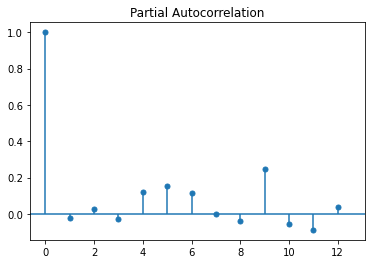

In [22]:
_ = plot_pacf(y,lags = 12)

In [24]:
for i in range(4, 7):
    X_2[f"Lag_{i}"] = y.shift(i)

In [25]:
X_2.head()

,id,store_nbr,onpromotion,AUTOMOTIVE,BABY CARE,BEAUTY,BEVERAGES,BOOKS,BREAD/BAKERY,CELEBRATION,...,PET SUPPLIES,PLAYERS AND ELECTRONICS,POULTRY,PREPARED FOODS,PRODUCE,SCHOOL AND OFFICE SUPPLIES,SEAFOOD,Lag_4,Lag_5,Lag_6
date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,0,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2013-01-01,1,1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2013-01-01,2,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2013-01-01,3,1,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2013-01-01,4,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN


In [26]:
for i in range(4, 7):
    X_test[f"Lag_{i}"] = np.zeros(X_test.shape[0])

In [27]:
X_test.head()

,id,store_nbr,onpromotion,AUTOMOTIVE,BABY CARE,BEAUTY,BEVERAGES,BOOKS,BREAD/BAKERY,CELEBRATION,...,PLAYERS AND ELECTRONICS,POULTRY,PREPARED FOODS,PRODUCE,SCHOOL AND OFFICE SUPPLIES,SEAFOOD,trend,Lag_4,Lag_5,Lag_6
date,,,,,,,,,,,,,,,,,,,,,
2017-08-16,3000888,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3000889.0,0.0,0.0,0.0
2017-08-16,3000889,1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3000890.0,0.0,0.0,0.0
2017-08-16,3000890,1,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3000891.0,0.0,0.0,0.0
2017-08-16,3000891,1,20,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3000892.0,0.0,0.0,0.0
2017-08-16,3000892,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3000893.0,0.0,0.0,0.0


In [28]:
X_2 = X_2.fillna(0.0)

In [30]:
y.head()


date
2013-01-01    0.0
2013-01-01    0.0
2013-01-01    0.0
2013-01-01    0.0
2013-01-01    0.0
Name: sales, dtype: float64

In [31]:
X_train, X_valid, y_train, y_valid = train_test_split(X_1, y, test_size=0.2, shuffle=False)



In [32]:
modelL = LinearRegression()
modelL.fit(X_train, y_train)

LinearRegression()

In [33]:
y_pred = modelL.predict( X_train )
y_pred_valid = modelL.predict( X_valid )

In [34]:
y_train - y_pred

date
2013-01-01   -184.324621
2013-01-01   -184.324741
2013-01-01   -184.324861
2013-01-01   -184.324981
2013-01-01   -184.325101
                 ...    
2016-09-12   -446.153770
2016-09-12   -463.153890
2016-09-12   -471.154009
2016-09-12   -301.645129
2016-09-12   -291.154249
Name: sales, Length: 2400710, dtype: float64

In [35]:
mean_absolute_error(y_valid, modelL.predict(X_valid))

687.3088119098555

In [37]:
y

date
2013-01-01       0.000
2013-01-01       0.000
2013-01-01       0.000
2013-01-01       0.000
2013-01-01       0.000
                ...   
2017-08-15     438.133
2017-08-15     154.553
2017-08-15    2419.729
2017-08-15     121.000
2017-08-15      16.000
Name: sales, Length: 3000888, dtype: float64

In [38]:
X_train, X_valid, y_train, y_valid = train_test_split(X_2, y, test_size=0.2, shuffle=False)

In [39]:
modelX = XGBRegressor(n_estimators=20)
modelX.fit(X_train, y_train-y_pred)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=20, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [40]:
mean_absolute_error(y_valid, modelX.predict(X_valid))

483.1481862099756

In [41]:
gg= modelX.predict(X_valid)

In [42]:
gg

array([-457.06058, -457.06058, -278.4184 , ..., 2847.2197 , -219.2271 ,
       -429.79712], dtype=float32)

In [43]:
# import warnings
# warnings.filterwarnings('ignore')

preds = []

for i in range(1):
    y_pred = modelL.predict(pd.DataFrame(X_test.trend))

    y_pred += modelX.predict(X_test.drop("trend", axis=1))
    
    X_test["Lag_4"][i] = y[-4]
    X_test["Lag_5"][i] = y[-5]
    X_test["Lag_6"][i] = y[-6]
    
    preds.append(y_pred)

<ipython-input-43-51351eb65b62>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["Lag_4"][i] = y[-4]
<ipython-input-43-51351eb65b62>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["Lag_5"][i] = y[-5]
<ipython-input-43-51351eb65b62>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["Lag_6"][i] = y[-6]


In [44]:
preds

[array([125.56425865, 125.56437854, 260.42924453, ..., 651.62057261,
        328.63586737, 133.54422091])]

In [45]:
df = pd.DataFrame({
    "id": X_test.trend.astype(np.int32)-1,
    "sales": preds[0]
})

df.to_csv("submission.csv", index=False)